## 1. Import libraries and load the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pmdarima as pmd
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [3]:
# Load the dataset
df = pd.read_csv("./ETH.csv")

df = df[['Price']]
df = df.dropna()
df = df.reset_index(drop=True)

df

,Price
0,1736.45
1,1752.80
2,1751.56
3,1840.41
4,1845.68
...,...
2218,88.17
2219,92.56
2220,90.37
2221,89.90


## 2. Split the data into training, test and validate sets

In [4]:
train_size = int(0.7 * len(df))
test_size = int(0.15 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1556, 1)
Test shape: (333, 1)
Validate shape: (334, 1)


In [5]:
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1333, 1)
Test shape: (444, 1)
Validate shape: (446, 1)


In [6]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1556, 1)
Test shape: (444, 1)
Validate shape: (223, 1)


## 3. Perform Linear Regression Model 

### 3.1 Build and fit Linear Regression Model

In [7]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [8]:
def evaluate_lr_model(x_data, y_data):
    y_pred = model.predict(x_data)
    mse = mean_squared_error(y_data, y_pred)
    mae = mean_absolute_error(y_data, y_pred)
    mape = mean_absolute_percentage_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

### 3.2 Evaluate on Validate data

In [9]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_lr_model(x_test, y_test)

### 3.3 Evaluate on Test data

In [10]:
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val, val_mse, val_mae, val_mape, val_rmse =  evaluate_lr_model(x_val, y_val)

### 3.4 Predict price for the next 30 days

In [11]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[ -998.54151405 -1000.2051881  -1001.86886214 -1003.53253619
 -1005.19621023 -1006.85988428 -1008.52355832 -1010.18723237
 -1011.85090642 -1013.51458046 -1015.17825451 -1016.84192855
 -1018.5056026  -1020.16927664 -1021.83295069 -1023.49662473
 -1025.16029878 -1026.82397283 -1028.48764687 -1030.15132092
 -1031.81499496 -1033.47866901 -1035.14234305 -1036.8060171
 -1038.46969114 -1040.13336519 -1041.79703924 -1043.46071328
 -1045.12438733 -1046.78806137]


In [12]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

                   MSE          MAE      MAPE         RMSE
Validate  1.258995e+06  1118.651815  4.171523  1122.049272
Test      7.285770e+05   690.195740  1.471831   853.567234


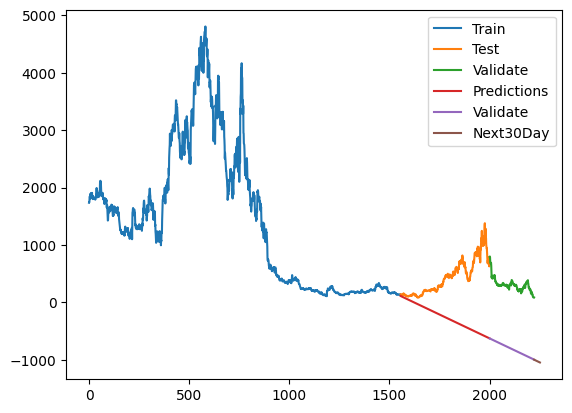

In [15]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Predictions','Validate','Next30Day'])
plt.show()